<a href="https://colab.research.google.com/github/Derevenitckaia/Digital_Image_Processing/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторная работа No4: Фильтрация изображений в частотной области


Цель работы – изучение методов обработки цифровых изображений в частотной области. Приобретение навыков использования преобразования Фурье, частотной фильтрации.

In [233]:
import cv2 as cv
import numpy as np
from numpy.fft import fft2, ifft2
from numpy.fft import fftshift, ifftshift
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

###1. Подготовить свой портрет в цифровом формате (полутоновое изображение с разрешением не более 800×800). Получить изображение фурье-спектра. 

In [234]:
img = cv.imread('img.jpg', cv.IMREAD_GRAYSCALE)[:, 0:800]

spectr = fft2(img)
spectr = fftshift(spectr)


plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(np.log(abs(spectr)), cmap='gray')
plt.title('Изображение')

Text(0.5, 1.0, 'Изображение')

### 2. Провести низкочастотную фильтрацию изображения с использованием: 

* идеального фильтра низких частот:

<ipython-input-235-d996156087eb>:19: RuntimeWarning:

divide by zero encountered in log



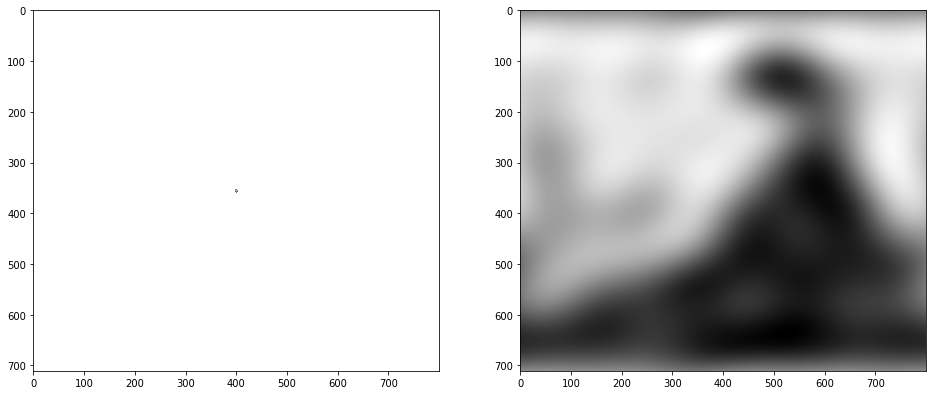

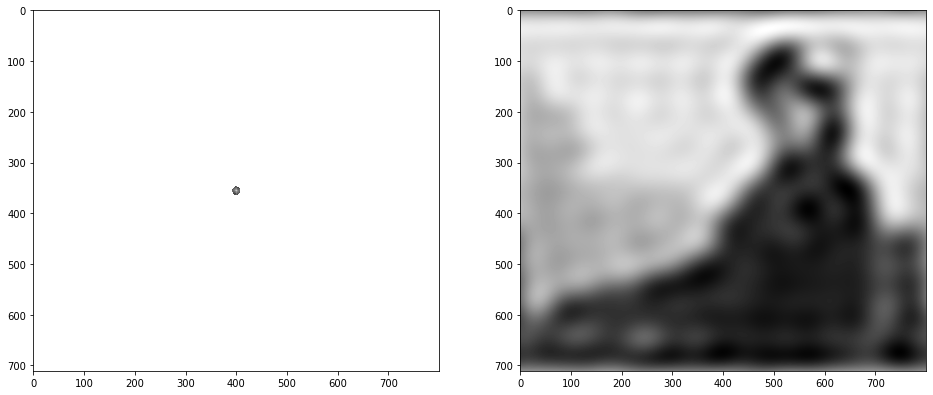

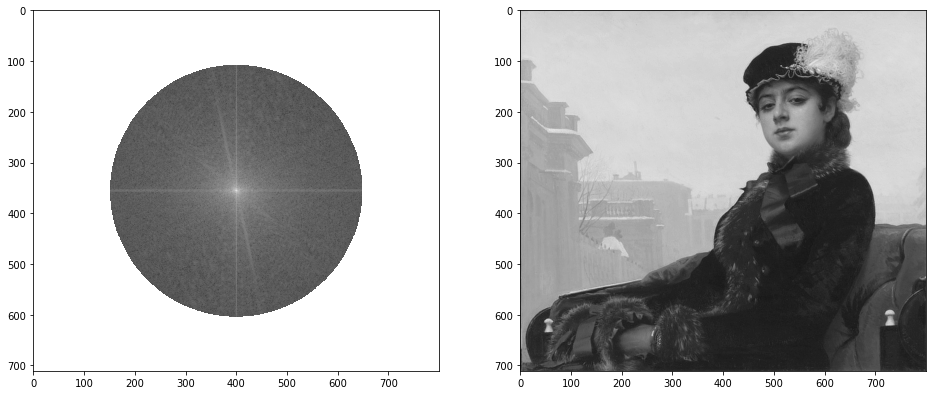

In [235]:
M, N = spectr.shape

D0 = [5, 10, 50, 250]

for d in D0:
  changed_spectr = spectr.copy()
  for u in range(M):
    for v in range(N):
      if (((u - M/2)**2 + (v - N/2)**2) <= d**2):
        changed_spectr[u, v] = spectr[u, v];
      else:
        changed_spectr[u, v] = 0
  shift_spectr = ifftshift(changed_spectr)
  filtered_img = np.abs(ifft2(shift_spectr))


  plt.figure(figsize=(16, 8))
  plt.subplot(1, 2, 1)
  plt.imshow(np.log(abs(changed_spectr)), cmap='gray')
  plt.subplot(1, 2, 2)
  plt.imshow(filtered_img , cmap='gray')




* фильтра Баттерворта низких частот для n=2 и D0 =5,10,50,250

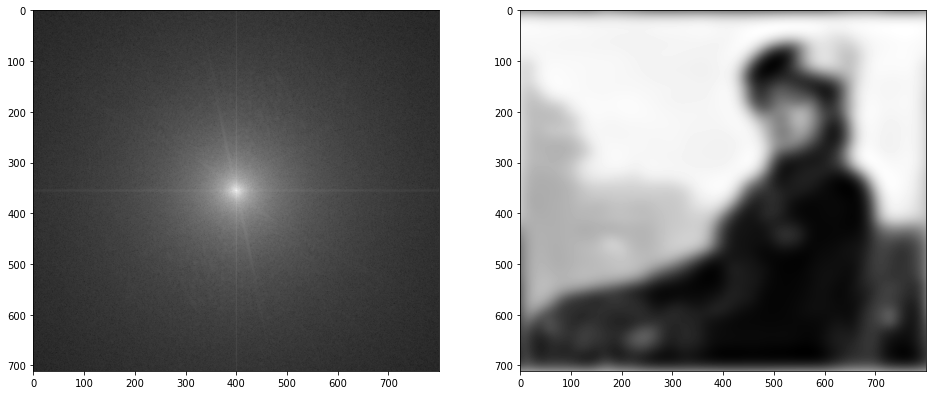

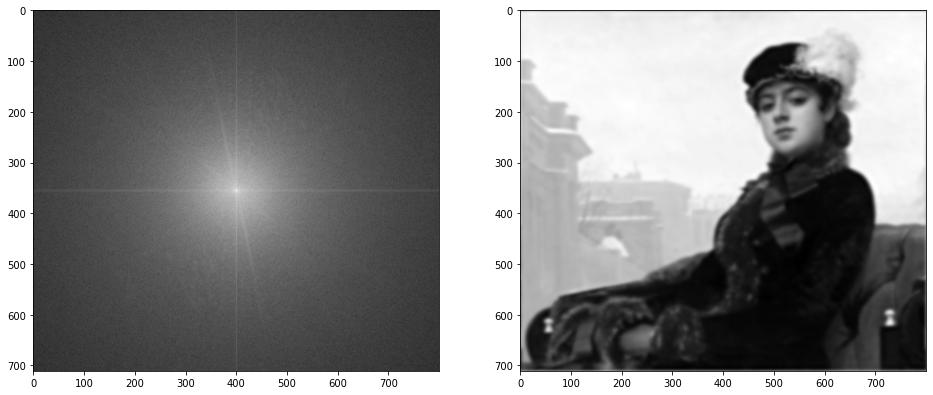

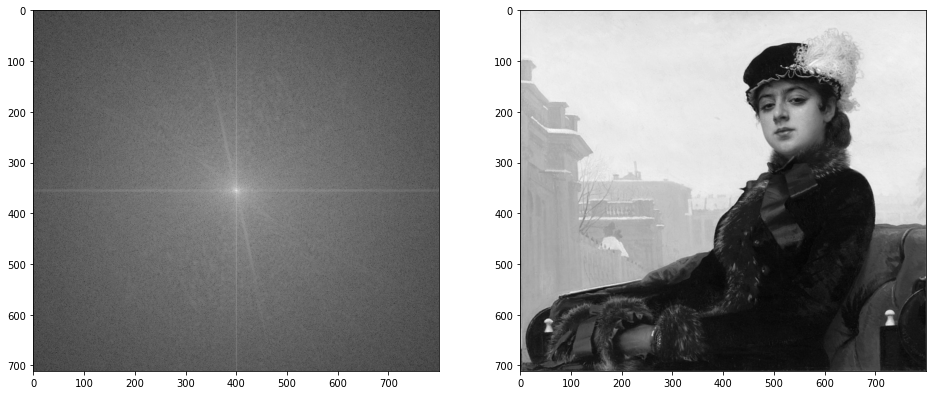

In [236]:
D0 = [5, 10, 50, 250]
n = 2

H = np.zeros((M, N))

for d in D0:
  changed_spectr = spectr.copy()
  for u in range(M):
    for v in range(N):
      H[u, v] = 1/(1+ (np.sqrt((u - M/2)**2 + (v - N/2)**2)/d)**(2*n))

  changed_spectr = changed_spectr * H  
  shift_spectr = ifftshift(changed_spectr)
  filtered_img = np.abs(ifft2(shift_spectr))


  plt.figure(figsize=(16, 8))
  plt.subplot(1, 2, 1)
  plt.imshow(np.log(abs(changed_spectr)), cmap='gray')
  plt.subplot(1, 2, 2)
  plt.imshow(filtered_img , cmap='gray')

* фильтра Гауса низких частот

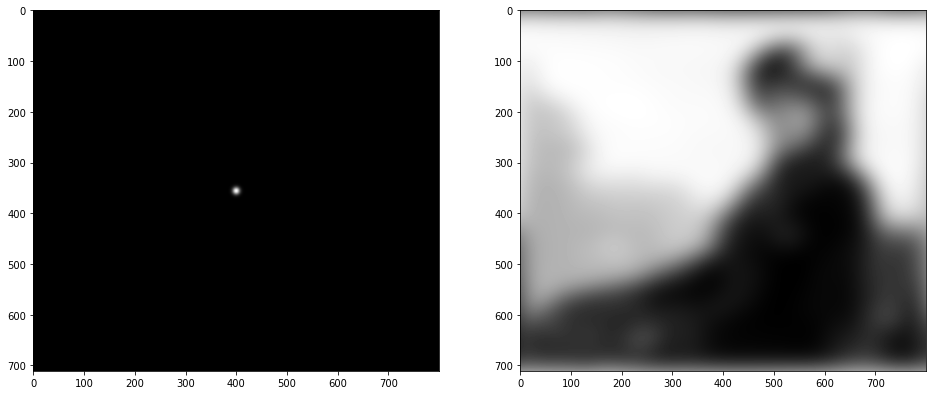

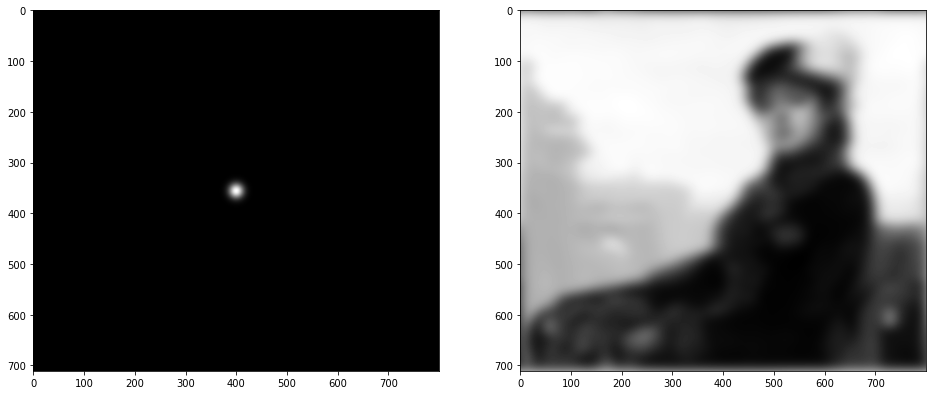

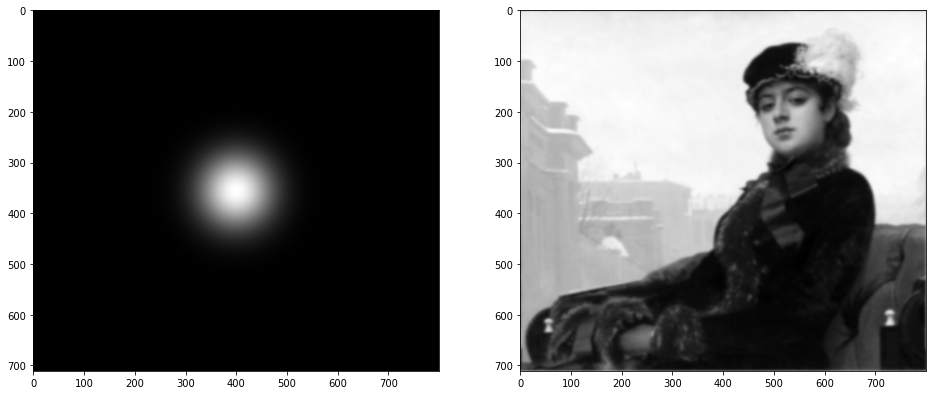

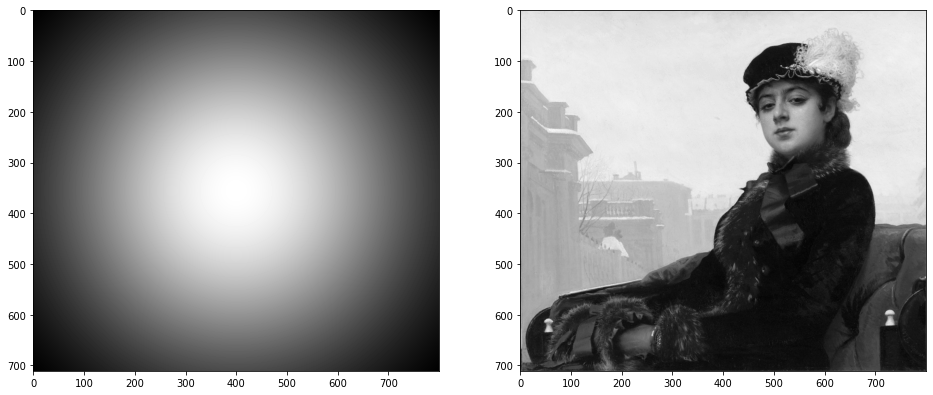

In [237]:
D0 = [5, 10, 50, 250]

H = np.zeros((M, N))

for d in D0:
  changed_spectr = spectr.copy()
  for u in range(M):
    for v in range(N):
      H[u, v] = np.exp(-((u - M/2)**2 + (v - N/2)**2)/(2*d**2))

  changed_spectr = changed_spectr * H  
  shift_spectr = ifftshift(changed_spectr)
  filtered_img = np.abs(ifft2(shift_spectr))


  plt.figure(figsize=(16, 8))
  plt.subplot(1, 2, 1)
  plt.imshow(H, cmap='gray')
  plt.subplot(1, 2, 2)
  plt.imshow(filtered_img , cmap='gray')

3. Провести высокочастотную фильтрацию изображения с использованием
* идеального фильтра высоких частот

<ipython-input-238-36dce7d8cf86>:17: RuntimeWarning:

divide by zero encountered in log



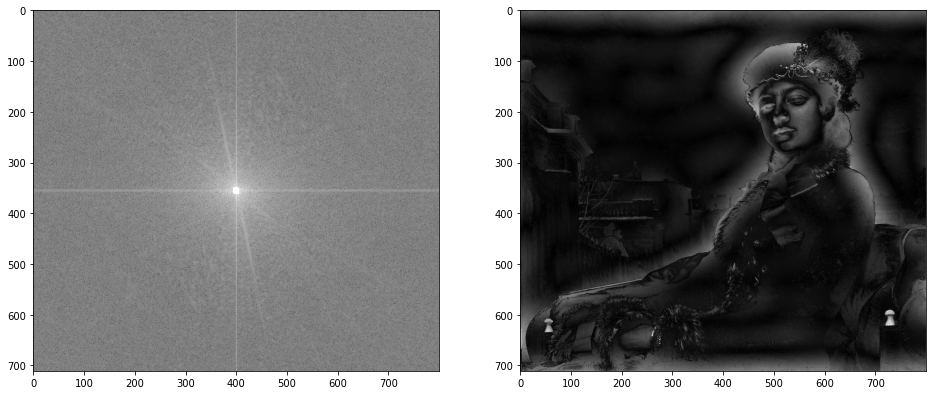

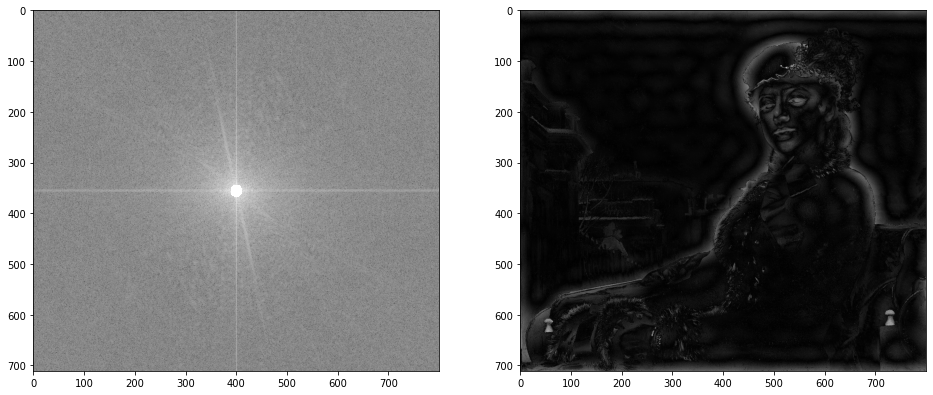

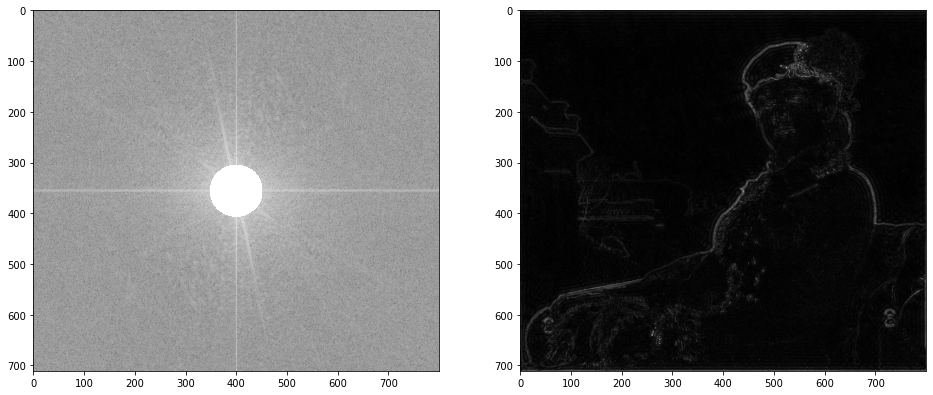

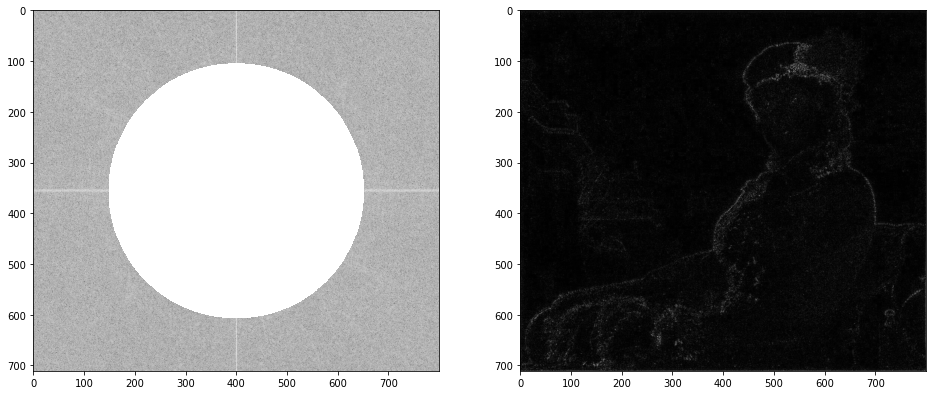

In [238]:
D0 = [5, 10, 50, 250]

for d in D0:
  changed_spectr = spectr.copy()
  for u in range(M):
    for v in range(N):
      if (((u - M/2)**2 + (v - N/2)**2) <= d**2):
        changed_spectr[u, v] = 0
      else:  
        changed_spectr[u, v] = spectr[u, v];
  shift_spectr = ifftshift(changed_spectr)
  filtered_img = np.abs(ifft2(shift_spectr))


  plt.figure(figsize=(16, 8))
  plt.subplot(1, 2, 1)
  plt.imshow(np.log(abs(changed_spectr)), cmap='gray')
  plt.subplot(1, 2, 2)
  plt.imshow(filtered_img , cmap='gray')



* фильтра Баттерворта высоких частот

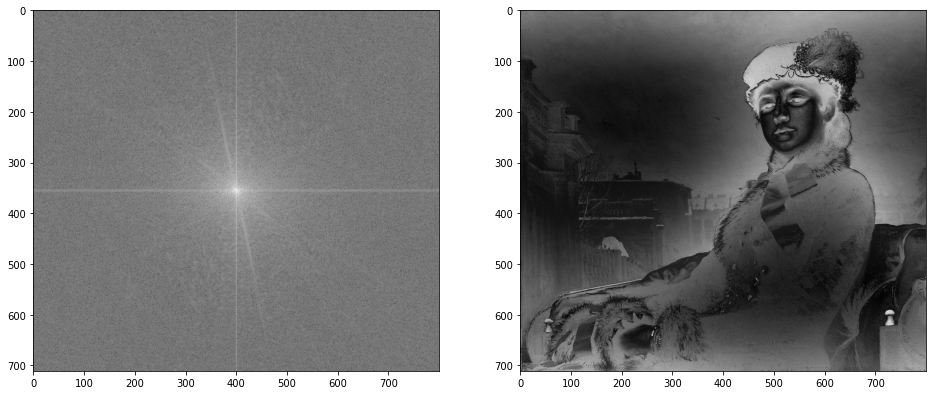

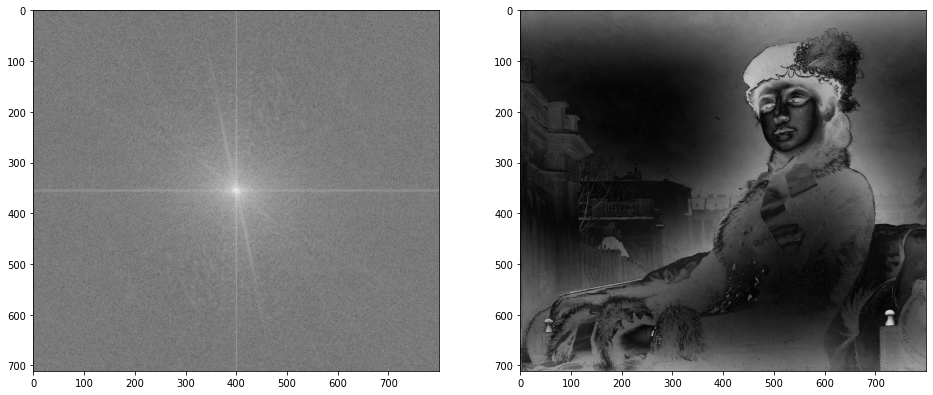

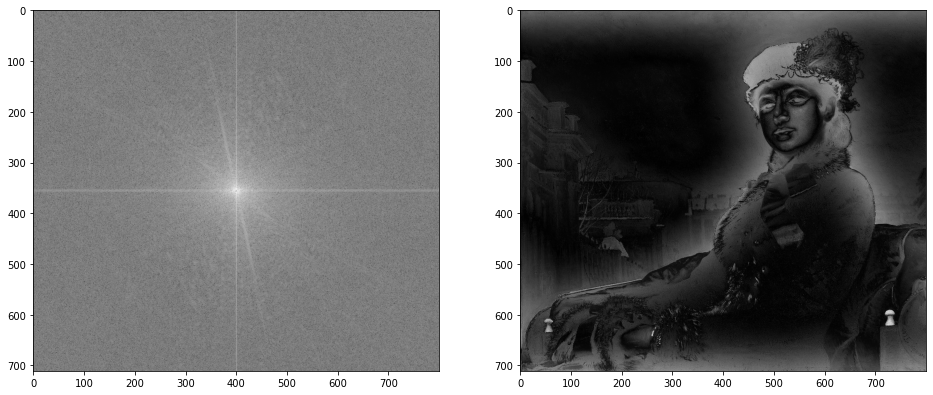

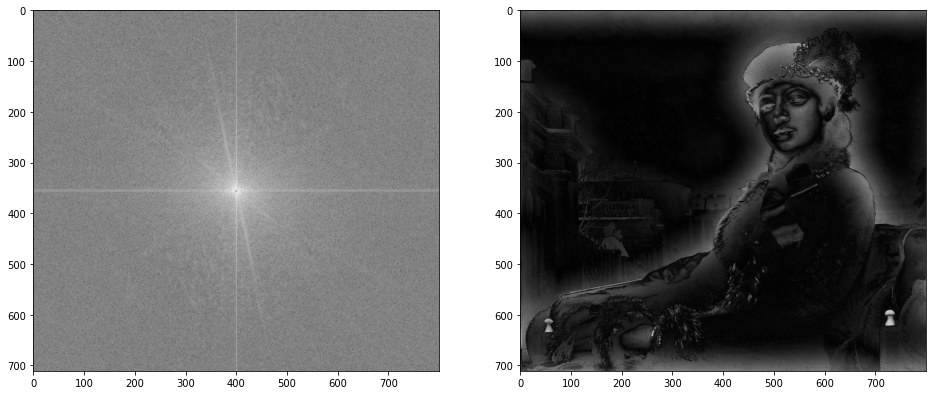

In [239]:
D0 = [5, 10, 50, 250]
n = 2

H = np.zeros((M, N))

for d in D0:
  changed_spectr = spectr.copy()
  for u in range(M):
    for v in range(N):
      H[u, v] = 1/(1+ (d/np.sqrt((u - M/2)**2 + (v - N/2)**2)**(2*n)))

  changed_spectr = changed_spectr * H  
  shift_spectr = ifftshift(changed_spectr)
  filtered_img = np.abs(ifft2(shift_spectr))


  plt.figure(figsize=(16, 8))
  plt.subplot(1, 2, 1)
  plt.imshow(np.log(abs(changed_spectr)), cmap='gray')
  plt.subplot(1, 2, 2)
  plt.imshow(filtered_img , cmap='gray')

* фильтра Гауса высоких частот

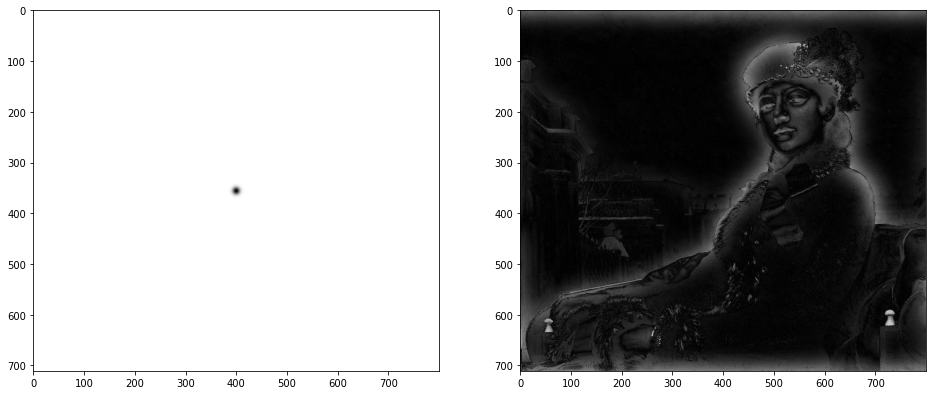

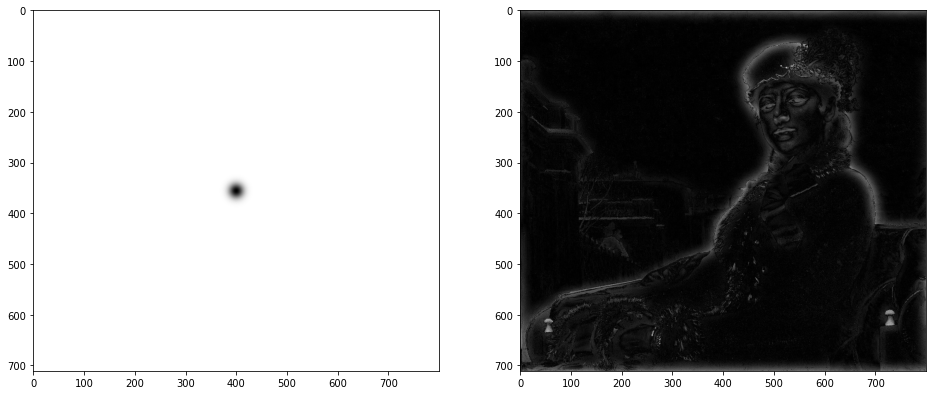

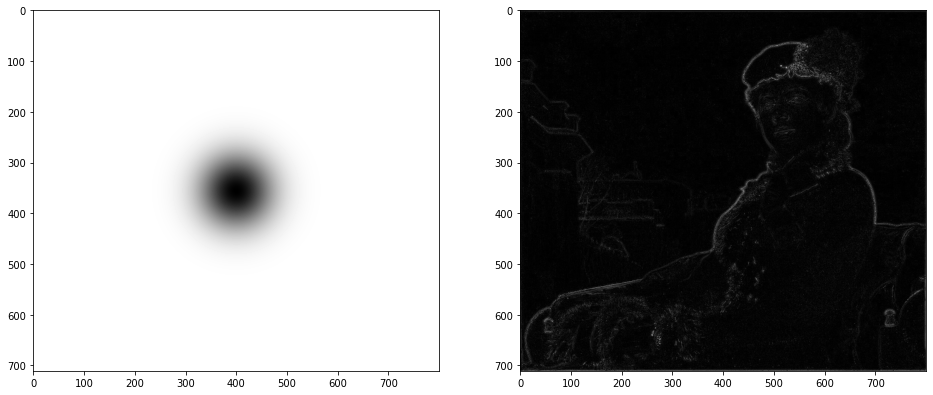

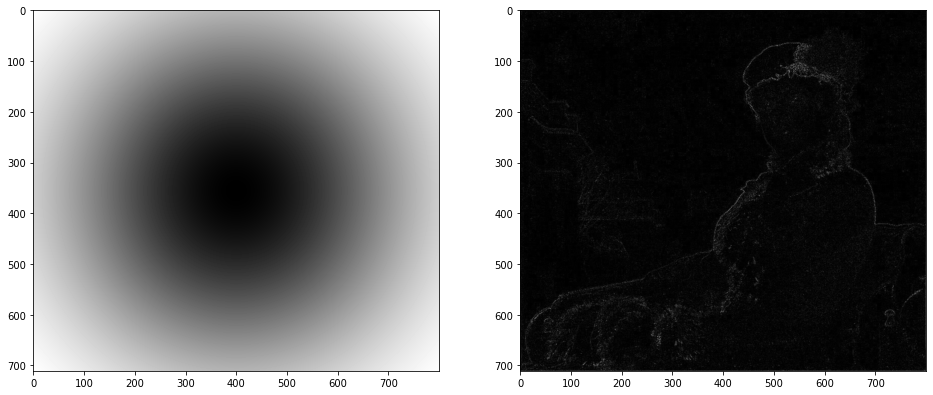

In [240]:
D0 = [5, 10, 50, 250]

H = np.zeros((M, N))

for d in D0:
  changed_spectr = spectr.copy()
  for u in range(M):
    for v in range(N):
      H[u, v] = 1 - np.exp(-((u - M/2)**2 + (v - N/2)**2)/(2*d**2))

  changed_spectr = changed_spectr * H  
  shift_spectr = ifftshift(changed_spectr)
  filtered_img = np.abs(ifft2(shift_spectr))


  plt.figure(figsize=(16, 8))
  plt.subplot(1, 2, 1)
  plt.imshow(H, cmap='gray')
  plt.subplot(1, 2, 2)
  plt.imshow(filtered_img , cmap='gray')

4. Подобрать и провести избирательную фильтрацию изображения, хранящегося в файле «lab4_var_X.jpg», где X – номер индивидуального задания.

Text(0.5, 1.0, 'Изображение')

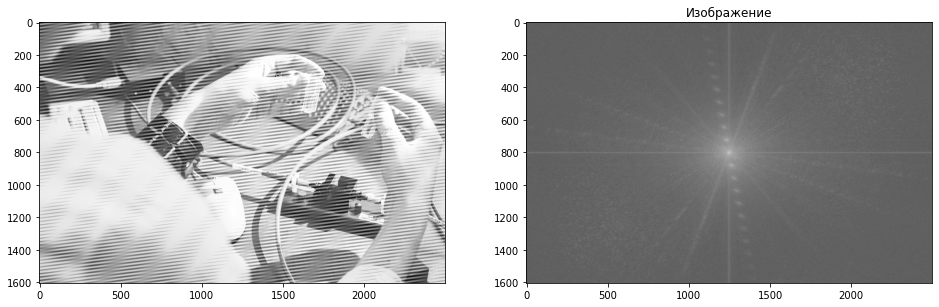

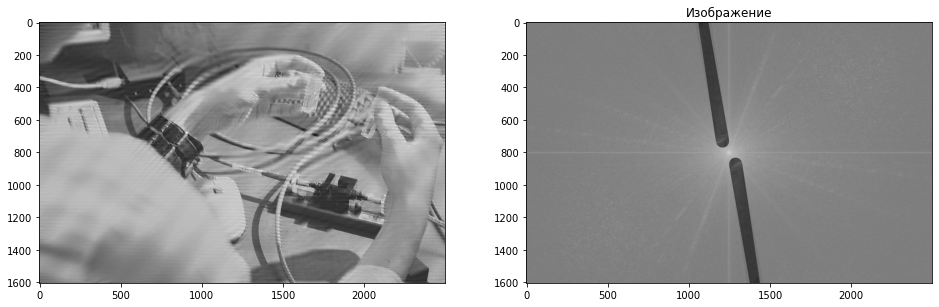

In [241]:
img = cv.imread('/content/11.png', cv.IMREAD_GRAYSCALE)

H = np.ones(img.shape)

spectr = fft2(img)
spectr = fftshift(spectr)

# H = cv.line(H, (800, 0), (1700, 1666 ), (0, 0, 0), 60) 

# H = cv.line(H, (800, 0), (1200, 700 ), (0, 0, 0), 100) 

# H = cv.line(H, (1340, 1000 ), (1700, 1666 ), (0, 0, 0), 100) 

# H = cv.line(H, (1300, 0 ), (1200, 700 ), (0, 0, 0), 100) 

# H = cv.line(H, (1250, 0), (1250, 700), (0, 0, 0), 100) 
# H = np.zeros(img.shape)
# H = cv.circle(H, (1250, 803), 70, (1,1,1), -1)

H = cv.line(H, (1100, 0), (1210, 733), (0, 0, 0), 80) 
H = cv.line(H, (1290, 873), (1430, 1666), (0, 0, 0), 80) 

# H = cv.line(H, (0, 300), (1190, 803), (0, 0, 0), 60) 
# H = cv.line(H, (1270, 880), (2300, 1230), (0, 0, 0), 60) 
ch_spectr = H * spectr

shift_spectr = ifftshift(ch_spectr)
filtered_img = np.abs(ifft2(shift_spectr))

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(np.log(abs(spectr)), cmap='gray')
plt.title('Изображение')



spectr = fft2(filtered_img )
spectr = fftshift(spectr)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(filtered_img , cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(np.log(abs(spectr)), cmap='gray')
plt.title('Изображение')


In [242]:
img.shape

(1604, 2500)